In [2]:
from lightkurve import KeplerTargetPixelFile
import lightkurve as lk
tpf = KeplerTargetPixelFile(r"C:\Users\hsynk\Desktop\kplr005780885-2010296114515_spd-targ.fits")
tpf

KeplerTargetPixelFile Object (ID: 5780885)

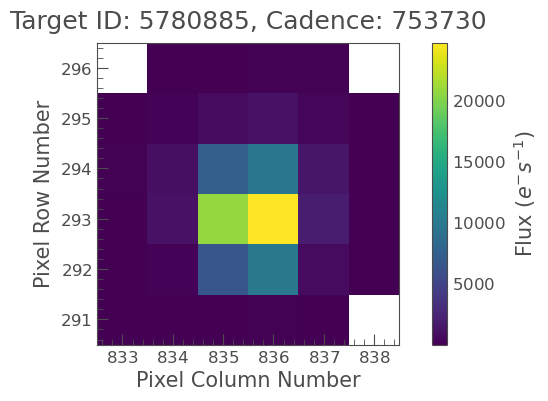

In [3]:
tpf.plot();

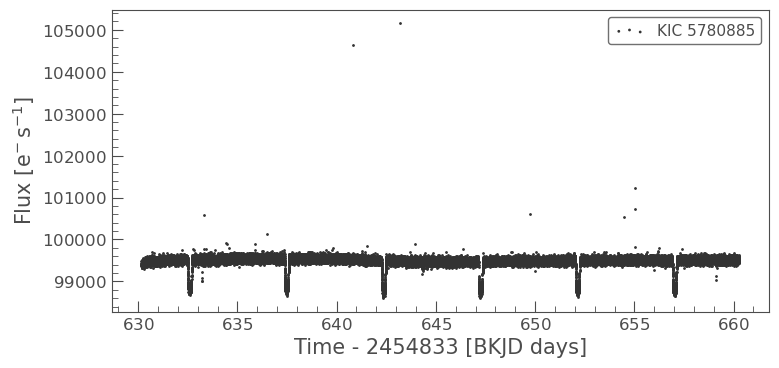

In [4]:
lc = tpf.to_lightcurve()
lc.scatter();

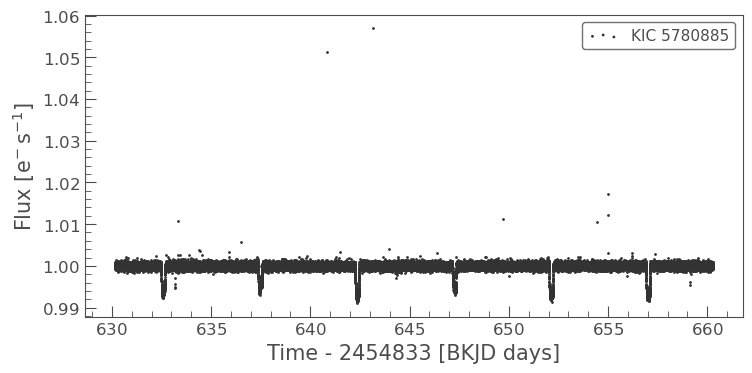

In [6]:
flat_lc = lc.flatten(window_length=635)
flat_lc.scatter();

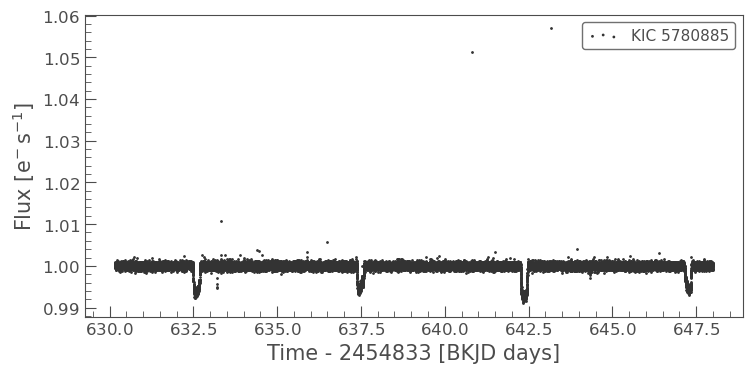

In [42]:
mask = (flat_lc.time < 648) | (flat_lc.time > 664)
masked_lc = flat_lc[mask]
masked_lc.scatter();

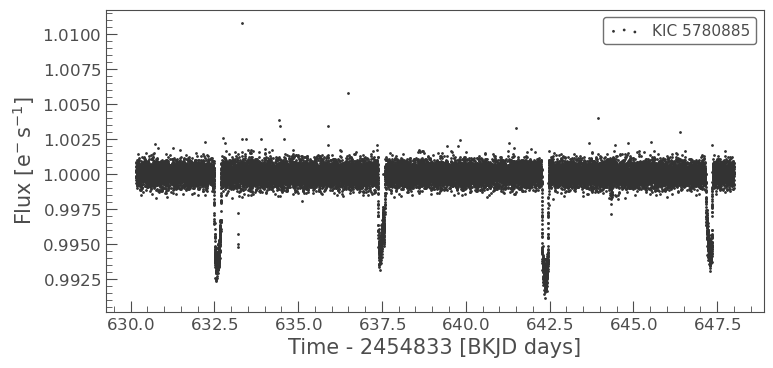

In [38]:
clipped_lc = masked_lc.remove_outliers(sigma=15)
clipped_lc.scatter();

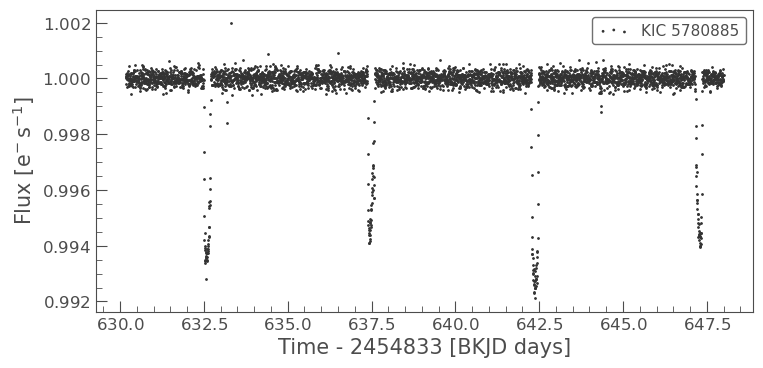

In [43]:
binned_lc = clipped_lc.bin(binsize=7)
binned_lc.scatter();

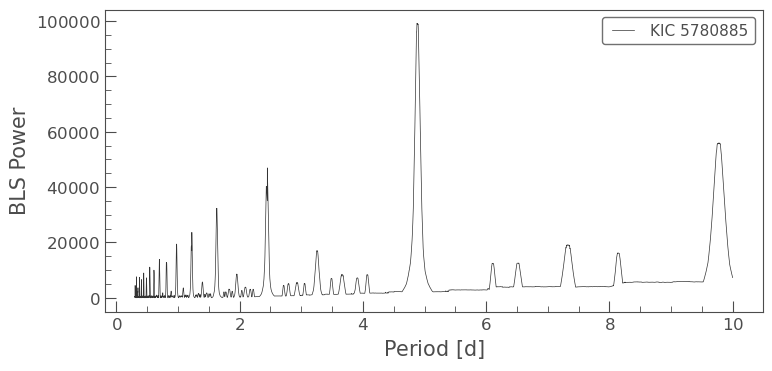

In [9]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.001))
periodogram.plot()

In [10]:
best_fit_period = periodogram.period_at_max_power
print('best fit period: {:.5f}'.format(best_fit_period))

best fit period: 4.87800 d


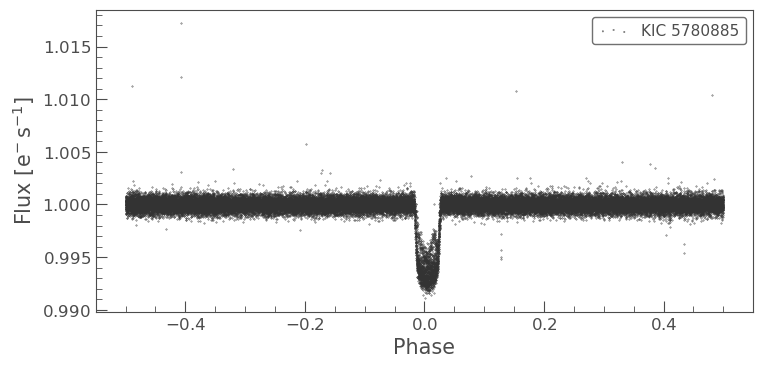

In [11]:
folded_lc = clipped_lc.fold(period=4.885525, t0=657)
folded_lc.scatter(s=0.1);

TypeError: 'KeplerLightCurve' object is not callable

In [44]:
binned_lc.to_fits('Kepler7bv9.fits')

In [13]:
clipped_lc.to_fits('Kepler7bv5.fits')